Số liệu thống kê cơ bản thống nhất được yêu cầu để khám phá tập dữ liệu:

•  Khám phá mối quan hệ giữa một biến số với các dự đoán tiềm năng.
.  Đánh giá các biểu diễn dự đoán của máy dự báo học.
.  Hầu hết thống kê đơn biến đều dựa trên mô hình tuyến tính là một trong những mô hình chính trong học máy.

# Main distributions

### The Chi-Square distribution

Phân phối Chi-bình phương với k bậc tự do (degrees of freedom, df) là phân phối của tổng k bình phương biến ngẫu nhiên có phân phối chuẩn hóa độc lập và là một trong những phân phối thường được sử dụng trong thống kê suy luận như kiểm định giả thuyết thống kê hay xây dựng khoảng tin cậy.

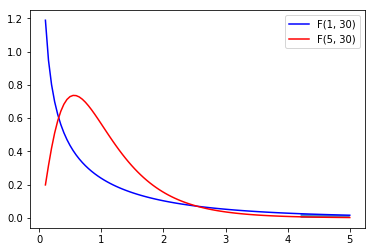

In [2]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
fvalues = np.linspace(.1, 5, 100)
# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()
# cdf(x, df1, df2): Cumulative distribution function of F.
# ie.
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)
# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95
# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup_3 == 1
# p-value: P(F(1, 30)) < 0.05

low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),
alpha=.8, label="P < 0.05")
plt.show()

### Pearson correlation test (quantitative ~ quantitative)

Kiểm định mối tương quan tuyến tính Pearson giữa 2 biến định lượng

In [3]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
# Compute with scipy
cor, pval = stats.pearsonr(x, y)
print(cor,pval)

0.942166535803 1.97248470762e-24


### One sample t -test (quantitative ~ constant)

Nếu muốn so sánh giá trị trung bình của tổng thể với một số cụ thể, ta thực hiện One-Sample T Test. 

2.15988000195 0.0331962960444


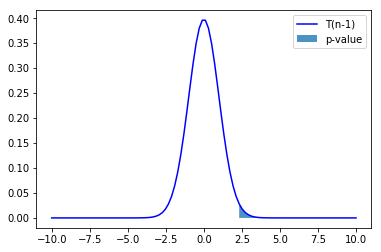

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(seed=42) # make example reproducible
n = 100
x = np.random.normal(loc=1.78, scale=.1, size=n) # the sample is here

# Compute everything with scipy
tval, pval = stats.ttest_1samp(x, 1.75)
print(tval, pval)

#tval = 2.1598800019529265 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tval]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
_ = plt.legend()

### Two sample t-test (quantitative ~ categorial (2 levels))

Nếu muốn so sánh hai giá trị trung bình của hai nhóm tổng thể, ta thực hiện phép kiểm định giả thiết về sự bằng nhau của hai trung bình tổng thể bằng cách sử dụng Independent Samples T Test.

In [5]:
import scipy.stats as stats
nx, ny = 50, 25
x = np.random.normal(loc=1.76, scale=0.1, size=nx)
y = np.random.normal(loc=1.70, scale=0.12, size=ny)
# Compute with scipy
tval, pval = stats.ttest_ind(x, y, equal_var=True)

# ANOVA

Phân tích sự khác biệt về thu nhập cho trình độ học vấn (có 3 loại học vấn khác nhau trở lên). 
So sánh trung bình thu nhập của 3 nhóm. (từ 3 mức trở lên). Phân tích phương sai 1 yếu tố.

### 𝐹-test (quantitative ~ categorial (>2 levels))

In [6]:
# dataset
mu_k = np.array([1, 2, 3]) # means of 3 samples
sd_k = np.array([1, 1, 1]) # sd of 3 samples
n_k = np.array([10, 20, 30]) # sizes of 3 samples
grp = [0, 1, 2] # group labels
n = np.sum(n_k)
label = np.hstack([[k] * n_k[k] for k in [0, 1, 2]])
y = np.zeros(n)
for k in grp:
    y[label == k] = np.random.normal(mu_k[k], sd_k[k], n_k[k])
# Compute with scipy
fval, pval = stats.f_oneway(y[label == 0], y[label == 1], y[label == 2])

### Chi-square, 𝜒2 (categorial ~ categorial)

Ví dụ: chúng ta có 100 người với trình độ học vấn khác nhau tại một tỉnh nọ. Câu hỏi đặt ra là có sự liên quan giữa giới tính và trình độ học vấn hay không. Lúc đó ta sẽ dùng kiểm định chi bình phương để tìm mối liên hệ giữa 2 biến phân loại. H0: A và B độc lập H1: A và B phụ thuộc.

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
# Dataset:
# 15 samples:
# 10 first with canalar tumor, 5 last without
canalar_tumor = np.array([1] * 10 + [0] * 5)
# 8 first with metastasis, 6 without, the last with.
meta = np.array([1] * 8 + [0] * 6 + [1])
crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[ 2.  3.]
 [ 4.  6.]]


# Non-parametric test of pairwise associations

### Spearman rank-order correlation (quantitative ~ quantitative)

Phân tích tương quan hạng giữa 2 biến xếp hạng. Ví dụ xem xét trình độ học vấn (1,2,3,4,5,6,7,8,9,10,11,12, Trung học, cao đẳng, đại học, cao học, tiến sỹ) 
với mức thu nhập (< 5 triệu, 5-7, 7-9, 9-13, 13-15, 15-18, 18 -22, 22-27, 27-31, 31-35, 35 - 40, 40 -50, 50-100) 

Non-Parametric Spearman cor test, cor: 0.2996, pval: 0.0345
Parametric Pearson cor test: cor: 0.0426, pval: 0.7687


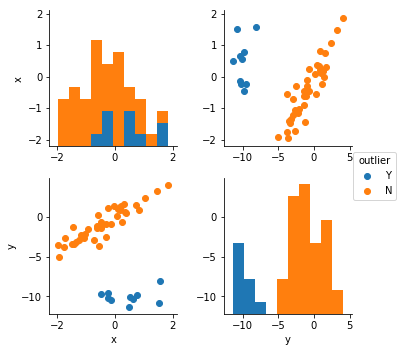

In [8]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(seed=42) # make example reproducible
n = 50
noutliers = 10
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
y[:noutliers] = np.random.normal(loc=-10, size=noutliers) # Add 40 outliers
outlier = np.array(["N"] * n)
outlier[:noutliers] = "Y"
# Compute with scipy
cor, pval = stats.spearmanr(x, y)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))
# Plot distribution + pairwise scatter plot
df = pd.DataFrame(dict(x=x, y=y, outlier=outlier))
g = sns.PairGrid(df, hue="outlier")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g = g.add_legend()
# Compute the parametric Pearsonw cor test
cor, pval = stats.pearsonr(x, y)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

# Linear model

### Simple linear regression (one continuous independent variable (IV))

Mô hình tuyến tính đơn biến mô tả mối quan hệ tuyến tính của 1 biến phụ thuộc liên tục với biến độc lập. Ví dụ xem xét Doanh số bán hàng với chi phí maketing của 1 công ty đối với 1 sản phảm cụ thể.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.github.com/neurospin/pystatsml/master/data/salary_table.csv'
salary = pd.read_csv(url)

y = 491.486913 x + 13584.043803, r: 0.538886, r-squared: 0.290398,
p-value: 0.000112, std_err: 115.823381


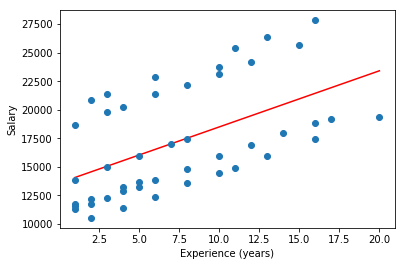

In [10]:
from scipy import stats
import numpy as np
y, x = salary.salary, salary.experience
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f"
% (beta, beta0, r_value, r_value**2, p_value, std_err))
# plotting the line
yhat = beta * x + beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

### Multiple regression

Hồi quy đa biến mô tả mối quan hệ tuyến tính giữa 1 biến phụ thuộc liên tục với nhiều biến độc lập.
Ví dụ như tiền tiết kiệm của 1 người với tiền chi tiêu, và trình độ học vấn.

In [32]:
import numpy as np
import scipy

np.random.seed(seed=42) # make the example reproducible

# Dataset
N, P = 50, 4
X = np.random.normal(size= N * P).reshape((N, P))

## Our model needs an intercept so we add a column of 1s:
X[:, 0] = 1 # Gán tất cả các giá trị cột 0 = 1
#print(X[:5, :])

betastar = np.array([10, 1., .5, 0.1])

# Tao N gia trai ngau nhien co pp chuan 
e = np.random.normal(size=N)

# tao ra gia tri y (Tich cua 2 vector (50,4) * (4,1) + e = (50,1)
y = np.dot(X, betastar) + e

# Estimate the parameters
Xpinv = scipy.linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
#print("Estimated beta:\n", betahat)

In [29]:
betastar = np.array([10, 1., .5, 0.1])

y = np.dot(X, betastar)
print("______________________________________")

a = np.array([1, 2, 3, 4])
b = np.array([[1, 2], [-2, 5],[1, 2], [3, 4]])
c = np.dot(a, b)
c1 = np.dot(b, a)

______________________________________


ValueError: shapes (4,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

# Linear model with statsmodels

### Multiple regression
##### Interface with Numpy

In [15]:
import statsmodels.api as sm
## Fit and summary:
model = sm.OLS(y, X).fit()
print(model.summary())
# prediction of new values
ypred = model.predict(X)
# residuals + prediction == true values
assert np.all(ypred + model.resid == y)

C:\Users\lhtam\AppData\Local\Programs\Python\Python36-32\Lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Fri, 05 Jan 2018   Prob (F-statistic):           0.000106
Time:                        08:39:41   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

##### Interface with Pandas

In [16]:
import statsmodels.formula.api as smfrmla
df = pd.DataFrame(np.column_stack([X, y]), columns=['inter', 'x1','x2', 'x3', 'y'])
# Build a model excluding the intercept, it is implicit
model = smfrmla.ols("y ~ x1 + x2 + x3", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Fri, 05 Jan 2018   Prob (F-statistic):           0.000106
Time:                        08:39:41   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1474      0.150     67.520      0.0

##### Multiple regression with categorical independent variables or factors: Analysis of covariance (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression. ANCOVA evaluates
whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable
(IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables
that are not of primary interest, known as covariates (CV).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.github.com/neurospin/pystatsml/master/data/salary_table.csv'
salary = pd.read_csv(url)
print(salary)

    salary  experience education management
0    13876           1  Bachelor          Y
1    11608           1      Ph.D          N
2    18701           1      Ph.D          Y
3    11283           1    Master          N
4    11767           1      Ph.D          N
5    20872           2    Master          Y
6    11772           2    Master          N
7    10535           2  Bachelor          N
8    12195           2      Ph.D          N
9    12313           3    Master          N
10   14975           3  Bachelor          Y
11   21371           3    Master          Y
12   19800           3      Ph.D          Y
13   11417           4  Bachelor          N
14   20263           4      Ph.D          Y
15   13231           4      Ph.D          N
16   12884           4    Master          N
17   13245           5    Master          N
18   13677           5      Ph.D          N
19   15965           5  Bachelor          Y
20   12336           6  Bachelor          N
21   21352           6      Ph.D

##### One-way AN(C)OVA

• ANOVA: one categorical independent variable, i.e. one factor.


• ANCOVA: ANOVA with some covariates.

In [19]:
import statsmodels.formula.api as smfrmla
oneway = smfrmla.ols('salary ~ management + experience', salary).fit()
print(oneway.summary())
aov = sm.stats.anova_lm(oneway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     138.2
Date:                Fri, 05 Jan 2018   Prob (F-statistic):           1.90e-19
Time:                        08:42:22   Log-Likelihood:                -407.76
No. Observations:                  46   AIC:                             821.5
Df Residuals:                      43   BIC:                             827.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.021e+04    525.999     

##### Two-way AN(C)OVA
Ancova with two categorical independent variables, i.e. two factors.

In [20]:
import statsmodels.formula.api as smfrmla
twoway = smfrmla.ols('salary ~ education + management + experience', salary).fit()
print(twoway.summary())
aov = sm.stats.anova_lm(twoway, typ=2) # Type 2 ANOVA DataFrame
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Fri, 05 Jan 2018   Prob (F-statistic):           2.23e-27
Time:                        08:43:12   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8035.5976    

##### Comparing two nested models

oneway is nested within twoway. Comparing two nested models tells us if the additional predictors (i.e.
education) of the full model significantly decrease the residuals. Such comparison can be done using an 𝐹-test on
residuals:

In [21]:
print(twoway.compare_f_test(oneway)) # return F, pval, df

(43.351589459181071, 7.672449570495418e-11, 2.0)
